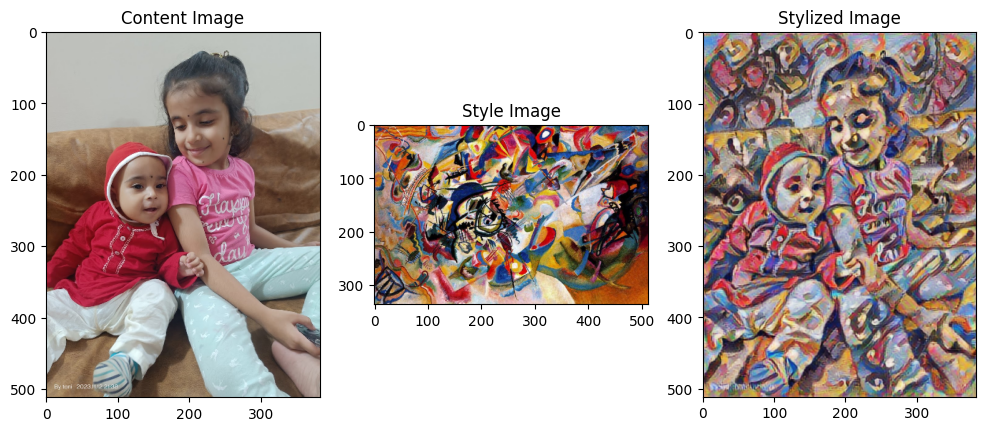

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

# Load content and style images
content_image = plt.imread('/content/HN.jpg')
style_image = plt.imread('/content/Vassily_Kandinsky,_1913_-_Composition_7.jpg')

# Load image processing functions and the style transfer model
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Function to preprocess the image
def load_img(image):
    max_dim = 512
    img = tf.convert_to_tensor(image)
    img = tf.image.convert_image_dtype(img, tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

# Function to display the image
def show_img(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)

# Preprocess the images
content_image = load_img(content_image)
style_image = load_img(style_image)

# Perform style transfer
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

# Display the images
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
show_img(content_image, 'Content Image')

plt.subplot(1, 3, 2)
show_img(style_image, 'Style Image')

plt.subplot(1, 3, 3)
show_img(stylized_image, 'Stylized Image')

plt.show()
